In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/placement.csv')

In [ ]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.describe()

,cgpa,resume_score,placed
count,100.0000,100.000000,100.000000
mean,6.9422,6.930500,0.500000
std,1.1192,0.979608,0.502519
min,5.2700,4.950000,0.000000
25%,5.9800,6.190000,0.000000
50%,6.6200,7.055000,0.500000
75%,8.0450,7.640000,1.000000
max,9.4000,9.060000,1.000000


from matplotlib import pyplot as plt
_df_0['cgpa'].plot(kind='hist', bins=20, title='cgpa')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['resume_score'].plot(kind='hist', bins=20, title='resume_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['placed'].plot(kind='hist', bins=20, title='placed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='cgpa', y='resume_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='resume_score', y='placed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['cgpa'].plot(kind='line', figsize=(8, 4), title='cgpa')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['resume_score'].plot(kind='line', figsize=(8, 4), title='resume_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['placed'].plot(kind='line', figsize=(8, 4), title='placed')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.isnull().sum()

,0
cgpa,0
resume_score,0
placed,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import matplotlib.pyplot as plt

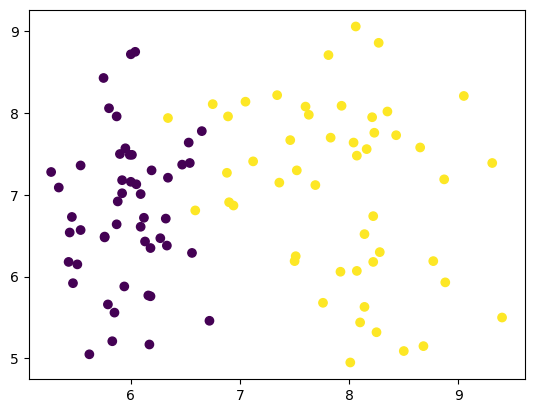

In [ ]:
plt.scatter(df['cgpa'] , df['resume_score'] , c=df['placed'])

In [ ]:
# now we are using logistic regression algorithm for this dataset
input_data = df.iloc[:,0:2]
output_data = df.iloc[:,-1]


In [ ]:
input_data

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [ ]:
output_data

,placed
0,1
1,0
2,1
3,1
4,1
...,...
95,0
96,1
97,0
98,1


In [ ]:
# scale the value btw -10 , 10
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_data = scaler.fit_transform(input_data)

In [ ]:
from sklearn.model_selection import train_test_split
input_data_train ,input_data_test , output_data_train , output_data_test = train_test_split(input_data , output_data , test_size = 0.1)

In [ ]:
input_data_train

array([[-5.40773431e-01,  2.86755705e-01],
       [-7.65272531e-01,  8.15637872e-02],
       [ 7.79281275e-01,  1.82569509e+00],
       [-8.46092207e-01,  1.83595468e+00],
       [ 1.14745980e+00, -1.95445302e-01],
       [ 1.56053814e+00, -1.82672105e+00],
       [ 2.12627587e+00,  4.71428431e-01],
       [ 1.53359825e+00,  6.66360752e-01],
       [-1.25917055e+00,  4.40649643e-01],
       [-6.75472891e-01,  3.79092068e-01],
       [-4.68754120e-02,  1.05622540e+00],
       [ 4.64982535e-01,  7.58697115e-01],
       [-5.58733359e-01, -2.26224089e-01],
       [-1.03467145e+00, -1.30348166e+00],
       [-1.07059131e+00,  1.53842640e+00],
       [-1.35795015e+00, -7.69982671e-01],
       [ 9.85820447e-01,  7.27918328e-01],
       [ 5.00902391e-01, -7.59723075e-01],
       [-3.70154116e-01,  7.27918328e-01],
       [-1.25917055e+00, -3.69858431e-01],
       [ 1.33603904e+00,  8.20254691e-01],
       [ 1.07562009e+00, -1.33426044e+00],
       [-1.43876983e+00,  1.63640554e-01],
       [ 1.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(input_data_train , output_data_train)


LogisticRegression()

In [ ]:
output_predict = clf.predict(input_data_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(output_data_test , output_predict)


1.0

<Axes: >

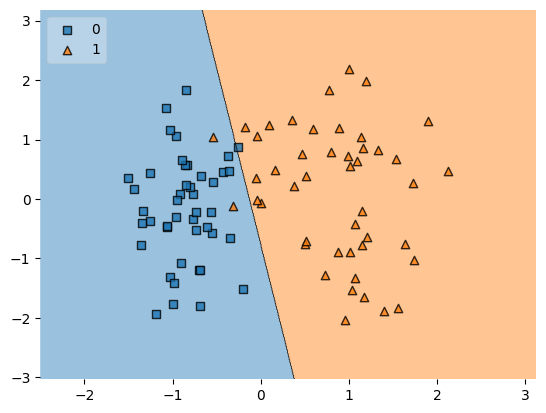

In [ ]:
## plot the decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(input_data_train , output_data_train.values , clf=clf , legend=2 )


In [ ]:
import pickle as p
p.dump(clf , open('model.pkl' , 'wb'))